In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 4.2

In [146]:
def showSignal(x):
    plt.figure()
    u,v=x()
    plt.stem(u,v)
    plt.xticks(u)
    plt.yticks(v)
    plt.axis('equal')
class Signal():
    def __init__(self,begin,end,val=None):
        self.begin=begin
        self.end=end
        self.val=val
    def __call__(self):
        x=np.arange(self.begin,self.end)
        y=np.array([self.__getitem__(k) for k in x])
        return x,y
    def __getitem__(self,k):
        if k>=self.begin and k<self.end:
            if self.val is None:
                return 1
            else:
                return self.val[k-self.begin]
        else:return 0
    def __len__(self):
        return self.end-self.begin
    def flip(self):
        return Signal(-self.end+1,-self.end+1+self.__len__())
    def dot(self,other):
        assert isinstance(other,Signal)
        s=[self.__getitem__(i)*other[i] for i in range(self.begin,self.end)]
        return sum(s)
    def shift(self,offset=1):
        return Signal(self.begin+offset,self.end+offset)
    def __str__(self):
        return "%d,%d"%(self.begin,self.end-1)
    def __add__(self,other):
        s=min(self.begin,other.begin)
        t=max(self.end,other.end)
        val=[self.__getitem__(k)+other[k] for k in range(s,t)]
        return Signal(s,t,val)
        
    def conv(self,other):
        assert isinstance(other,Signal)
        other=other.flip()
    
        kstart=self.begin-other.end
        kend=kstart+self.__len__()+len(other)+1
        
        val=[]
        for k in range(kstart,kend):
            o=other.shift(k)
            v=self.dot(o)
            val.append(v)
        return Signal(kstart,kend,val)

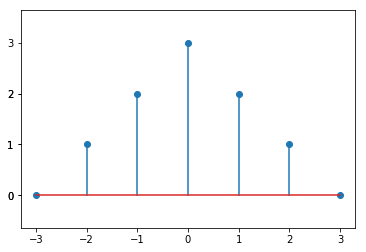

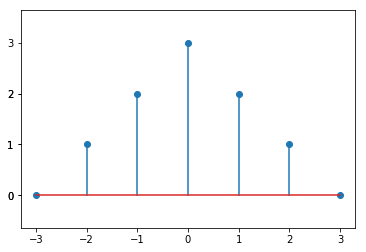

In [147]:
M=3
xval=[M-np.abs(k) for k in range(-M,M+1)]
x=Signal(-M,M+1,xval)
x1=Signal(0,M)
x2=Signal(-M+1,1)
xnew=x1.conv(x2)
# showSignal(x)
# showSignal(x1)
# showSignal(x2)
showSignal(xnew)
showSignal(x)

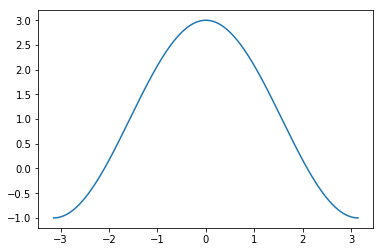

In [148]:
w=np.linspace(-np.pi,np.pi,1000)
mag=np.sin(w*M/2)/np.sin(w/2)
plt.plot(w,mag)

## 4.3

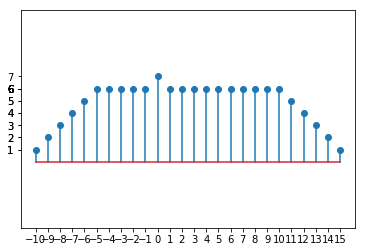

In [156]:
hn=Signal(0,6,[1,1,1,1,-2,-2])
r=Signal(0,1)
K=10
for i in range(-K,K+1):
    hs=hn.shift(i)
    r=r+hs
showSignal(r)